## Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

### In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

### By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

#### The approach to this exercise will be simple.  My plan is to sum the complaints by unique complaint type and return a list of ascending totals, from largest to smallest.  I will produce the same list in proportions as well.  The type of complaint NYC should focus on first would be their most frequent complaint type.  Let's see how many of each type there are.

In [4]:
#importing libraries
import numpy as np
import pandas as pd
#loading 311 data set
filename = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'
big_df = pd.read_csv(filename, parse_dates=True)
print('Uploaded')

Uploaded


In [16]:
big_df.dtypes # Checking the data types.

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [5]:
big_df['complaint_type'].value_counts() # Totaling the amount of complaints for each unique complaint type.  HEAT/HOT WATER complaints occur most frequently.

HEAT/HOT WATER            1162125
HEATING                    887869
PLUMBING                   704802
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       441502
PAINT - PLASTER            361258
PAINT/PLASTER              342508
ELECTRIC                   304521
NONCONST                   260890
DOOR/WINDOW                201339
WATER LEAK                 189392
GENERAL                    147734
FLOORING/STAIRS            135884
APPLIANCE                  110615
HPD Literature Request      52830
SAFETY                      50475
OUTSIDE BUILDING             7062
ELEVATOR                     6535
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

### It looks like heating and hot water complaints is the largest category by a large margin.  Let's visualize this in a bar chart.

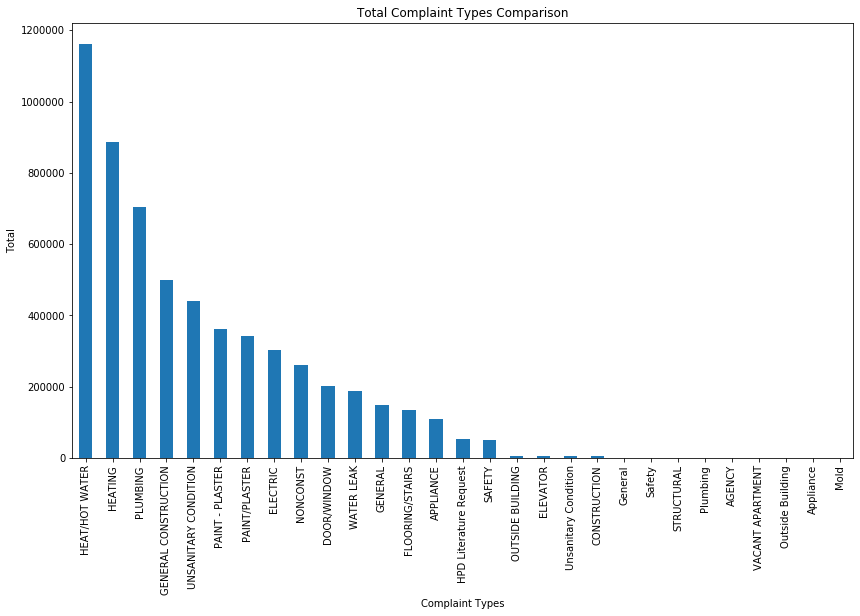

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(big_df, columns=['complaint_type'])
ax = df['complaint_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Total Complaint Types Comparison")
ax.set_xlabel("Complaint Types")
ax.set_ylabel("Total")

plt.show()

In [14]:
df['complaint_type'].value_counts(normalize=True) # Generating the proportion of each type.

HEAT/HOT WATER            1.976261e-01
HEATING                   1.509873e-01
PLUMBING                  1.198557e-01
GENERAL CONSTRUCTION      8.517465e-02
UNSANITARY CONDITION      7.507997e-02
PAINT - PLASTER           6.143402e-02
PAINT/PLASTER             5.824547e-02
ELECTRIC                  5.178556e-02
NONCONST                  4.436586e-02
DOOR/WINDOW               3.423886e-02
WATER LEAK                3.220721e-02
GENERAL                   2.512302e-02
FLOORING/STAIRS           2.310786e-02
APPLIANCE                 1.881072e-02
HPD Literature Request    8.984048e-03
SAFETY                    8.583566e-03
OUTSIDE BUILDING          1.200934e-03
ELEVATOR                  1.111315e-03
Unsanitary Condition      9.351368e-04
CONSTRUCTION              8.635433e-04
General                   1.977749e-04
Safety                    7.210366e-05
STRUCTURAL                2.720893e-06
Plumbing                  1.870614e-06
AGENCY                    1.530502e-06
VACANT APARTMENT         

### HEAT/HOT WATER complaints make up 19.7% of the total number of complaints, followed by HEATING at 15.1% and PLUMBING at 12.0%  My conclusion is that they should focus on these three categories first, starting with the largest and working their way down.